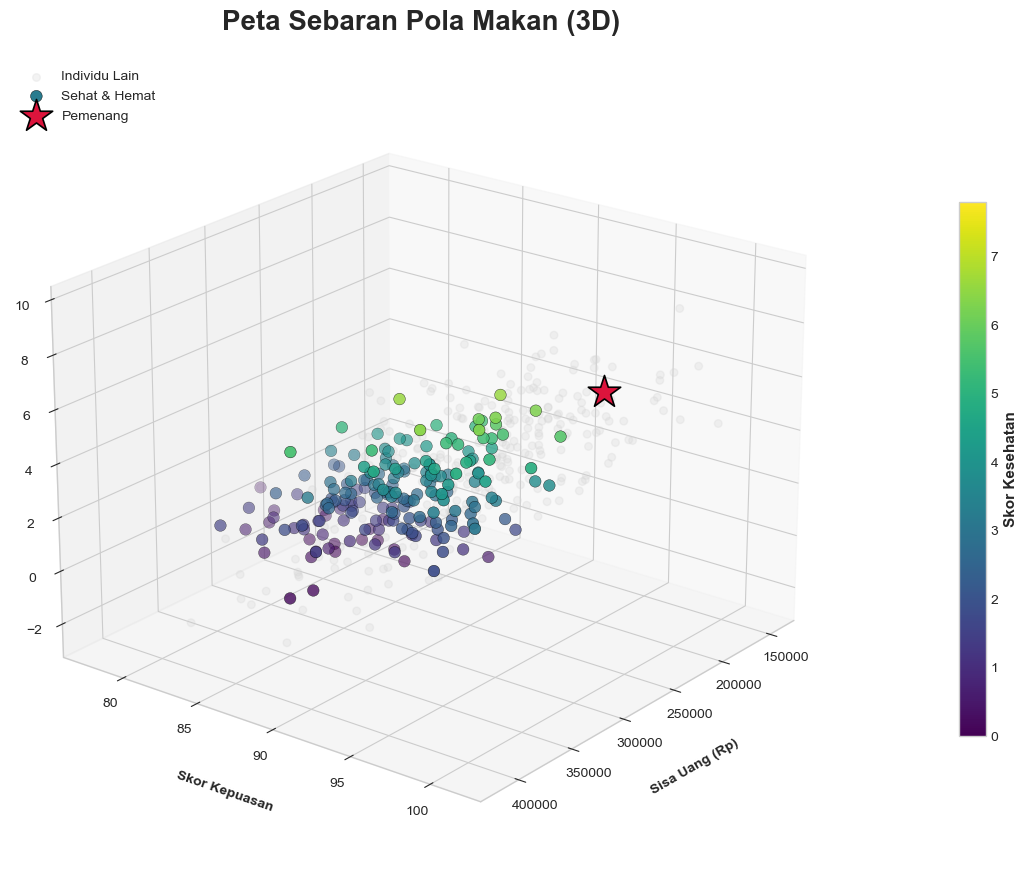

INTERPRETASI HASIL:
-Mayoritas titik abu-abu terlihat terkumpul di tengah-tengah area sisa uang sekitar 200–300 ribu dan skor kepuasan 10–15.
-Titik berwarna hijau-kuning jumlahnya tidak terlalu banyak yang berarti menunjukkan kombinasi pola makan yang memenuhi dua kriteria ini relatif sulit ditemukan.
-Pemenang berada pada area sisa uang di atas Rp275 ribu (hemat) dengan skor kepuasan tertinggi di antara pilihan sehat & hemat.
-Artinya pola makan optimal itu cenderung tetap bisa hemat tetapi dengan komposisi menu yang tidak terlalu mahal dan tetap bergizi.


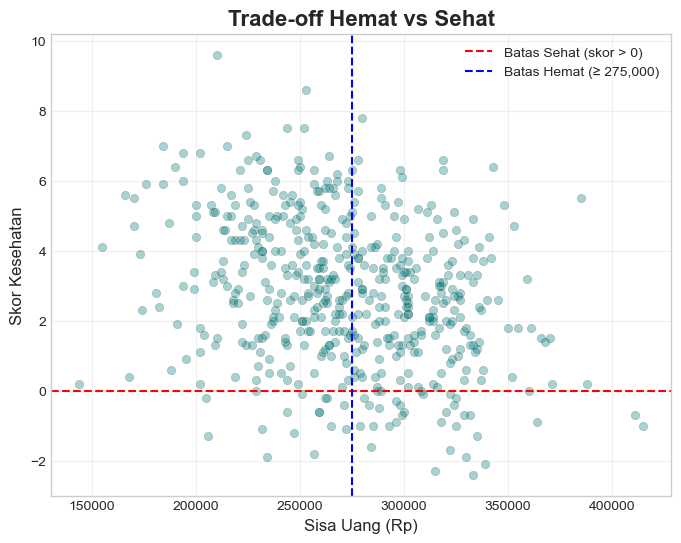

INTERPRETASI HASIL:
-Grafik memperlihatkan banyak titik berada di kiri atas yang berarti banyak yang memenuhi kriteria sehat namun cenderung kurang hemat.
-Tetapi titik di kanan atas juga tidak terbilang sedikit yang berarti sehat dapat dicapai walaupun harus hemat.


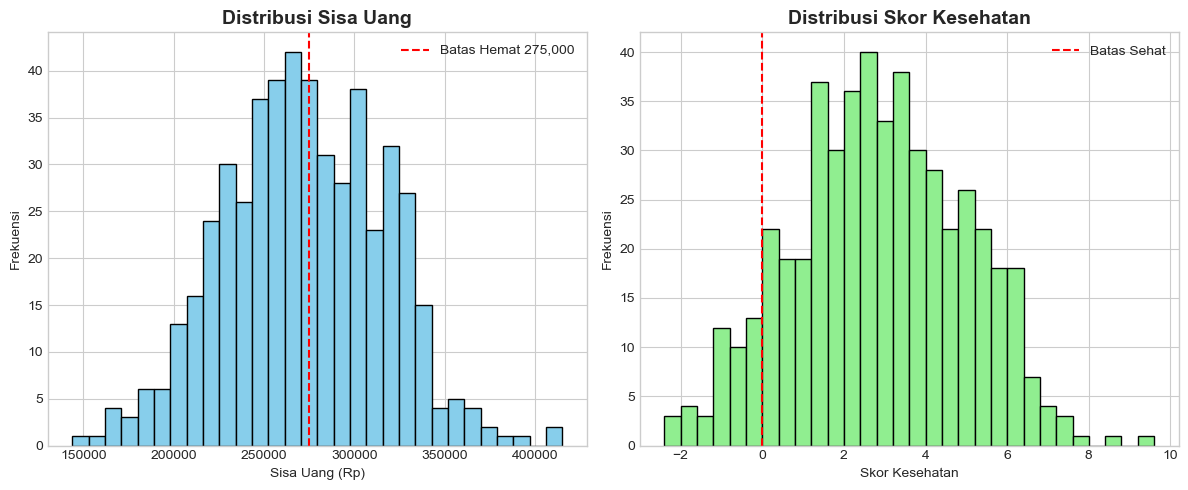

-Histogram sisa uang menunjukkan puncak di sekitar Rp200–300 ribu menandakan sebagian besar simulasi menghasilkan sisa di kisaran tersebut.
-Dengan melihat persebaran puncak yang masih dekat dengan batas hemat berarti bahwa makan hemat namun sehat memang benar dapat dicapai.
-Mayoritas skor kesehatan terkonsentrasi diatas nol yang berarti simulasi ini menghasilkan pola makan yang cenderung sehat.


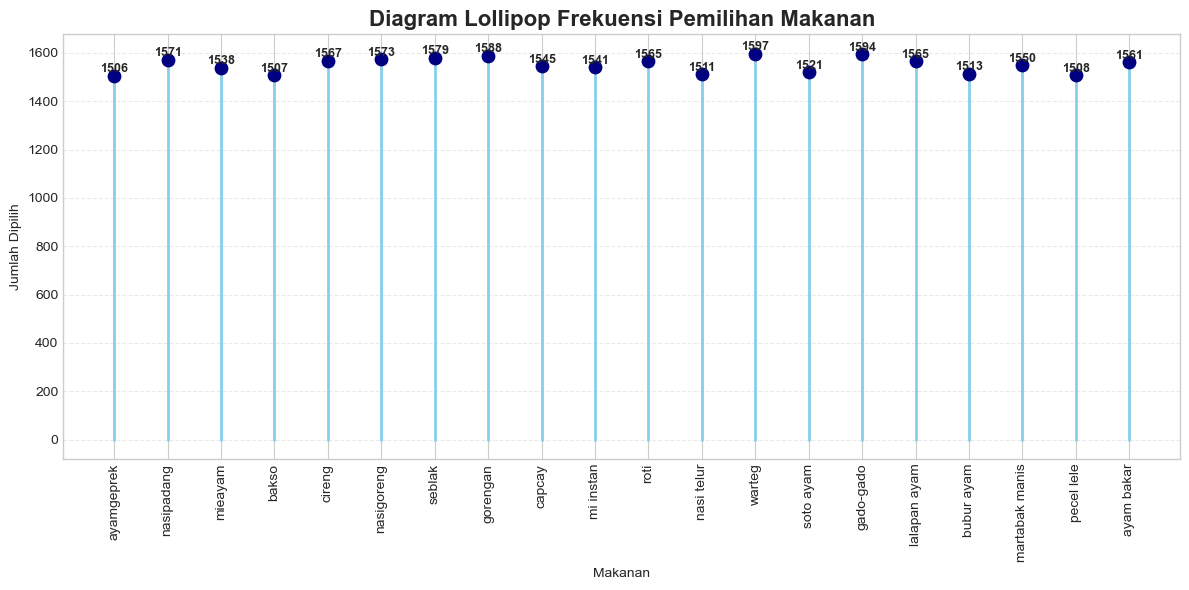

INTERPRETASI HASIL:
-Warteg dan gado-gado menjadi pilihan yang paling sering dipilih dikarenakan mengenyangkan dan cukup sehat.

--- HASIL ANALISIS TUGAS ---
TUGAS (1): Pola makan sehat
Ditemukan 451 pola makan yang sehat.
Daftar ID individu: 
[  1   2   4   5   6   7   8   9  10  11  12  13  14  16  17  19  20  21
  22  23  24  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40
  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  59  60  62  63  65  66  67  68  69  70  72  73  74  75  76  77  78  80
  81  83  86  87  88  89  90  92  93  94  95  96  97  98  99 100 101 102
 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 136 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 154 155 156 157 158 159 160
 161 163 166 167 168 169 171 172 173 174 176 177 179 180 181 182 183 184
 185 186 187 188 189 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 208 209 210 2

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
# ================================
# KODE PROGRAM POLA MAKAN TERBAIK
# ================================
makan = pd.read_csv("makanan.csv") 
NPM = 17
np.random.seed(NPM)
SAMPLE_NUM = 500
wkenyang_base = 0.8
wrasa_base    = 0.7
wsehat_base   = 0.9
wbosan_base   = 0.4

skor = np.zeros(SAMPLE_NUM, dtype=float)
sisa = np.zeros(SAMPLE_NUM, dtype=float)
sehat = np.zeros(SAMPLE_NUM, dtype=float)
resp_pilih = np.zeros((SAMPLE_NUM, 62), dtype=int)

# Batas hemat & sisa uang
SISA_MININUM = 275e3   # Rp275.000
SISA_MAKSIMUM = 400e3  # Rp400.000
bin_sisa = np.arange(SISA_MININUM, SISA_MAKSIMUM, 1000)
resp_sehat = np.zeros((SAMPLE_NUM, len(bin_sisa)), dtype=float)

# ======================
# SIMULASI POLA MAKAN
# ======================
for n in range(SAMPLE_NUM):
    budget = 1.15e6 
    skor_kumulatif = 0
    skor_sehat = 0
    
    for i in range(31): 
        # makan pertama
        pilihan = np.random.randint(0, len(makan))
        w_kenyang = np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa    = np.random.normal(loc=wrasa_base, scale=0.2)
        w_sehat   = np.random.normal(loc=wsehat_base, scale=0.4)
        w_bosan   = np.random.normal(loc=wbosan_base, scale=0.2)
        skor_kumulatif += w_kenyang*makan['kenyang'][pilihan] + w_rasa*makan['rasa'][pilihan] + w_sehat*makan['sehat'][pilihan] - w_bosan*makan['bosan'][pilihan]
        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget -= makan['harga'][pilihan]
        resp_pilih[n][2*i] = pilihan
        
        # makan kedua
        pilihan = np.random.randint(0, len(makan))
        w_kenyang = np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa    = np.random.normal(loc=wrasa_base, scale=0.2)
        w_sehat   = np.random.normal(loc=wsehat_base+0.2, scale=0.4)
        w_bosan   = np.random.normal(loc=wbosan_base*2, scale=0.2)
        skor_kumulatif += w_kenyang*makan['kenyang'][pilihan] + w_rasa*makan['rasa'][pilihan] + w_sehat*makan['sehat'][pilihan] - w_bosan*makan['bosan'][pilihan]
        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget -= makan['harga'][pilihan]
        resp_pilih[n][2*i+1] = pilihan   
    
    sisa[n] = budget
    skor[n] = skor_kumulatif
    sehat[n] = skor_sehat
    idx_sisa = int((budget - SISA_MININUM) / 1000)  
    if 0 <= idx_sisa < len(bin_sisa):
        resp_sehat[n][idx_sisa] = skor_sehat
        
idx_sehat_dan_hemat = np.where((sehat > 0) & (sisa >= SISA_MININUM))[0]

if len(idx_sehat_dan_hemat) > 0:
    skor_kandidat = skor[idx_sehat_dan_hemat]
    posisi_pemenang_relatif = np.argmax(skor_kandidat)
    id_pemenang = idx_sehat_dan_hemat[posisi_pemenang_relatif]
else:
    skor_kandidat = []
    id_pemenang = None

# ================================
# VISUALISASI SEBARAN POLA MAKAN
# ================================
style.use('seaborn-v0_8-whitegrid')
fig = plt.figure(figsize=(13, 9))
ax = fig.add_subplot(projection='3d')

# Semua individu
ax.scatter(sisa, skor, sehat, c='lightgrey', marker='o', alpha=0.25, s=30, label='Individu Lain')

# Kandidat sehat & hemat
if len(idx_sehat_dan_hemat) > 0:
    sc = ax.scatter(sisa[idx_sehat_dan_hemat], skor[idx_sehat_dan_hemat], sehat[idx_sehat_dan_hemat], 
                    c=sehat[idx_sehat_dan_hemat], cmap='viridis', marker='o', s=70, edgecolor='k', linewidth=0.3, label='Sehat & Hemat')
    # Pemenang
    ax.scatter(sisa[id_pemenang], skor[id_pemenang], sehat[id_pemenang], 
                c='crimson', marker='*', s=600, edgecolor='black', linewidth=1.2, zorder=10, label='Pemenang')
    cbar = fig.colorbar(sc, ax=ax, shrink=0.65, pad=0.1)
    cbar.set_label('Skor Kesehatan', fontsize=11, fontweight='bold')

ax.set_title('Peta Sebaran Pola Makan (3D)', fontsize=20, weight='bold', pad=20)
ax.set_xlabel('Sisa Uang (Rp)', fontweight='bold', labelpad=15)
ax.set_ylabel('Skor Kepuasan', fontweight='bold', labelpad=15)
ax.set_zlabel('Skor Kesehatan', fontweight='bold', labelpad=15)
ax.legend(loc='upper left', fontsize=10)
ax.view_init(elev=22, azim=38)
plt.tight_layout()
plt.show()

print('INTERPRETASI HASIL:')
print('-Mayoritas titik abu-abu terlihat terkumpul di tengah-tengah area sisa uang sekitar 200–300 ribu dan skor kepuasan 10–15.')
print('-Titik berwarna hijau-kuning jumlahnya tidak terlalu banyak yang berarti menunjukkan kombinasi pola makan yang memenuhi dua kriteria ini relatif sulit ditemukan.')
print('-Pemenang berada pada area sisa uang di atas Rp275 ribu (hemat) dengan skor kepuasan tertinggi di antara pilihan sehat & hemat.')
print('-Artinya pola makan optimal itu cenderung tetap bisa hemat tetapi dengan komposisi menu yang tidak terlalu mahal dan tetap bergizi.')

# ===================================
# VISUALISASI UNTUK ANALISIS LANJUT 
# ===================================

# Trade-off Hemat vs Sehat
plt.figure(figsize=(8,6))
plt.scatter(sisa, sehat, alpha=0.35, c='teal', edgecolors='k', linewidths=0.3)
plt.axhline(0, color='red', ls='--', label='Batas Sehat (skor > 0)')
plt.axvline(SISA_MININUM, color='blue', ls='--', label=f'Batas Hemat (≥ {int(SISA_MININUM):,})')
plt.title("Trade-off Hemat vs Sehat", fontsize=16, weight='bold')
plt.xlabel("Sisa Uang (Rp)", fontsize=12)
plt.ylabel("Skor Kesehatan", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print('INTERPRETASI HASIL:')
print('-Grafik memperlihatkan banyak titik berada di kiri atas yang berarti banyak yang memenuhi kriteria sehat namun cenderung kurang hemat.')
print('-Tetapi titik di kanan atas juga tidak terbilang sedikit yang berarti sehat dapat dicapai walaupun harus hemat.')

# Distribusi Sisa Uang & Skor Kesehatan
fig, axes = plt.subplots(1, 2, figsize=(12,5))
axes[0].hist(sisa, bins=30, color='skyblue', edgecolor='black')
axes[0].axvline(SISA_MININUM, color='red', linestyle='--', label=f'Batas Hemat {int(SISA_MININUM):,}')
axes[0].set_title("Distribusi Sisa Uang", fontsize=14, weight='bold')
axes[0].set_xlabel("Sisa Uang (Rp)")
axes[0].set_ylabel("Frekuensi")
axes[0].legend()

axes[1].hist(sehat, bins=30, color='lightgreen', edgecolor='black')
axes[1].axvline(0, color='red', linestyle='--', label='Batas Sehat')
axes[1].set_title("Distribusi Skor Kesehatan", fontsize=14, weight='bold')
axes[1].set_xlabel("Skor Kesehatan")
axes[1].set_ylabel("Frekuensi")
axes[1].legend()

plt.tight_layout()
plt.show()

# INTERPRETASI HASIL:
print('-Histogram sisa uang menunjukkan puncak di sekitar Rp200–300 ribu menandakan sebagian besar simulasi menghasilkan sisa di kisaran tersebut.')
print('-Dengan melihat persebaran puncak yang masih dekat dengan batas hemat berarti bahwa makan hemat namun sehat memang benar dapat dicapai.')
print('-Mayoritas skor kesehatan terkonsentrasi diatas nol yang berarti simulasi ini menghasilkan pola makan yang cenderung sehat.')

# Frekuensi Pemilihan Makanan 
plt.figure(figsize=(12,6))
x = np.arange(len(nama_makanan))
y = frekuensi.values

# Gambar garis batang (lollipop)
for i, val in enumerate(y):
    plt.plot([i, i], [0, val], color='skyblue', linewidth=2)
    plt.scatter(i, val, color='navy', s=80, zorder=3)  # kepala lollipop
    plt.text(i, val + 2, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')
plt.xticks(x, nama_makanan, rotation=90)
plt.title("Diagram Lollipop Frekuensi Pemilihan Makanan", fontsize=16, weight='bold')
plt.xlabel("Makanan")
plt.ylabel("Jumlah Dipilih")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

print('INTERPRETASI HASIL:')
print('-Warteg dan gado-gado menjadi pilihan yang paling sering dipilih dikarenakan mengenyangkan dan cukup sehat.')

# ======================
# JAWABAN DARI TUGAS
# ======================
print("\n--- HASIL ANALISIS TUGAS ---")
idx_sehat = np.where(sehat > 0)[0]
print(f"TUGAS (1): Pola makan sehat")
print(f"Ditemukan {len(idx_sehat)} pola makan yang sehat.")
print(f"Daftar ID individu: \n{idx_sehat}\n")

print(f"TUGAS (2): Pola makan sehat & hemat (sisa ≥ Rp{int(SISA_MININUM):,})")
print(f"Ditemukan {len(idx_sehat_dan_hemat)} individu sehat & hemat.")
print(f"Daftar ID individu: \n{idx_sehat_dan_hemat}\n")

if id_pemenang is not None:
    print(f"TUGAS (3): ID pemenang = {id_pemenang}")
    print(f"  - Skor Kumulatif: {skor[id_pemenang]:.2f}")
    print(f"  - Skor Kesehatan: {sehat[id_pemenang]:.2f}")
    print(f"  - Sisa Uang: Rp {sisa[id_pemenang]:,.2f}\n")

    print(f"TUGAS (4): Jadwal Makanan ID {id_pemenang}")
    jadwal_pemenang = []
    pilihan_pemenang = resp_pilih[id_pemenang]
    for hari in range(31):
        pagi = makan['makanan'].iloc[pilihan_pemenang[hari*2]]
        malam = makan['makanan'].iloc[pilihan_pemenang[hari*2+1]]
        jadwal_pemenang.append([f"Hari {hari+1}", pagi, malam])
    df_jadwal = pd.DataFrame(jadwal_pemenang, columns=['Hari', 'Makan Pertama', 'Makan Kedua'])
    print(df_jadwal.to_string())
else:
    print("Tidak ada individu yang memenuhi kriteria (3) dan (4).")

print(' ')
print('INTERPRETASI HASIL:')
print('-Jumlah pola makan sehat banyak tetapi yang sehat sekaligus hemat hanya setengah dari jumlah pola makan sehat.')
print('-Pemenang adalah yang punya skor kepuasan tertinggi.')
print('-Jadwal pemenang bisa dilihat untuk dianalisis menu hariannya.')

# ======================================
# RATA-RATA SISA UANG DAN SKOR KEPUASAN
# ======================================
print(' ')
print(' ')
print('NILAI RATA-RATA SISA UANG DAN SKOR KEPUASAN')
print(' ')
print("Rata-rata sisa uang (sehat):", sisa[sehat>0].mean())
print("Rata-rata sisa uang (tidak sehat):", sisa[sehat<=0].mean())
print("Rata-rata skor kepuasan (sehat):", skor[sehat>0].mean())
print(' ')
print('INTERPRETASI HASIL:')
print('-Terlihat dari statistik di atas bahwa rata-rata sisa uang antara sehat dan tidak sehat cenderung mirip yang berarti makan sehat tidak harus mahal.')
print('-Skor kepuasan pola sehat cukup tinggi makan sehat tidak berarti tidak puas.')

# PROMPT DAN JAWABAN

In [ ]:
# Bagaimana cara menentukan bobot paling bagus untuk kenyang, rasa, sehat, bosan?

# JAWABAN: 
# Tidak ada angka baku — bobot sebaiknya disesuaikan dengan prioritas tujuan: Jika ingin diet sehat → perbesar w_sehat.
# Jika ingin puas dan kenyang dengan harga terjangkau → perbesar w_kenyang dan w_rasa.
# Jika ingin menghindari kebosanan → perbesar w_bosan agar menu yang sama dihukum.
# Kamu bisa mencoba beberapa kombinasi (misalnya normalisasi total bobot ke 1) lalu melihat distribusi hasil pada grafik untuk memilih kombinasi terbaik.

In [81]:
# Apakah pada data saya scatter grafik paling jelas dan bagus? 

# JAWABAN: 
# Scatter 3D cocok untuk melihat distribusi 3 variabel (sisa uang, kepuasan, kesehatan).
# Scatter lebih cocok bila ingin menonjolkan individu pemenang dan kandidat.
# Surface/heatmap cocok untuk melihat tren keseluruhan (misal daerah kombinasi yang cenderung sehat dan hemat).

In [83]:
# Bagaimana cara menentukan scale yang paling benar?

# JAWABAN: 
# Pilihan umum: 0.1–0.2 → variasi moderat (hasil simulasi stabil tapi tetap realistis). >0.3 → variasi besar, cocok untuk eksplorasi sensitivitas.
#Kamu juga bisa eksperimen: kecilkan untuk simulasi yang lebih konsisten, atau besarkan untuk meniru populasi yang sangat beragam.

In [ ]:
# Cari indeks simulasi dengan kesehatan positif (sehat > 0). 
# Dari indeks itu, pilih yang sisa uangnya > 0.
# Cari simulasi dengan skor kumulatif terbesar di antara yang sehat.
# Cetak jadwal makan yang dipilih (resp_pilih) untuk simulasi terbaik.

# JAWABAN:

# (1) Cari indeks simulasi dengan kesehatan positif
#idx_sehat = np.where(sehat > 0)[0]
#print(f"(1) Jumlah pola makan sehat: {len(idx_sehat)}")
#print(f"    ID individu sehat: {idx_sehat}\n")

# (2) Dari yang sehat, pilih yang sisa uangnya > 0
#idx_sehat_sisa = idx_sehat[sisa[idx_sehat] > 0]
#print(f"(2) Jumlah pola makan sehat & sisa uang positif: {len(idx_sehat_sisa)}")
#print(f"    ID individu sehat & hemat: {idx_sehat_sisa}\n")

# (3) Cari simulasi dengan skor kumulatif terbesar di antara yang sehat
#if len(idx_sehat) > 0:
    #id_terbaik = idx_sehat[np.argmax(skor[idx_sehat])]
    #print(f"(3) ID simulasi terbaik: {id_terbaik}")
    #print(f"    Skor kumulatif : {skor[id_terbaik]:.2f}")
    #print(f"    Skor kesehatan : {sehat[id_terbaik]:.2f}")
    #print(f"    Sisa uang      : Rp {sisa[id_terbaik]:,.0f}\n")
#else:
    #id_terbaik = None
    #print("(3) Tidak ada simulasi dengan kesehatan positif.\n")

# (4) Cetak jadwal makan untuk simulasi terbaik
#if id_terbaik is not None:
    #print(f"(4) Jadwal makan untuk ID {id_terbaik}")
    #jadwal = []
    #for hari in range(31):
        #pagi = makan['makanan'].iloc[resp_pilih[id_terbaik][hari*2]]
        #malam = makan['makanan'].iloc[resp_pilih[id_terbaik][hari*2+1]]
        #jadwal.append([f"Hari {hari+1}", pagi, malam])
    #df_jadwal = pd.DataFrame(jadwal, columns=["Hari", "Makan Pagi", "Makan Malam"])
    #print(df_jadwal.to_string(index=False))